In [4]:
import librosa
import librosa.display
import scipy as sp
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np

In [9]:
# load audio file in the player
audio_path = "audio/piano_c.wav"  # Do ~
ipd.Audio(audio_path)

In [6]:
# load audio file
signal, sr = librosa.load(audio_path)

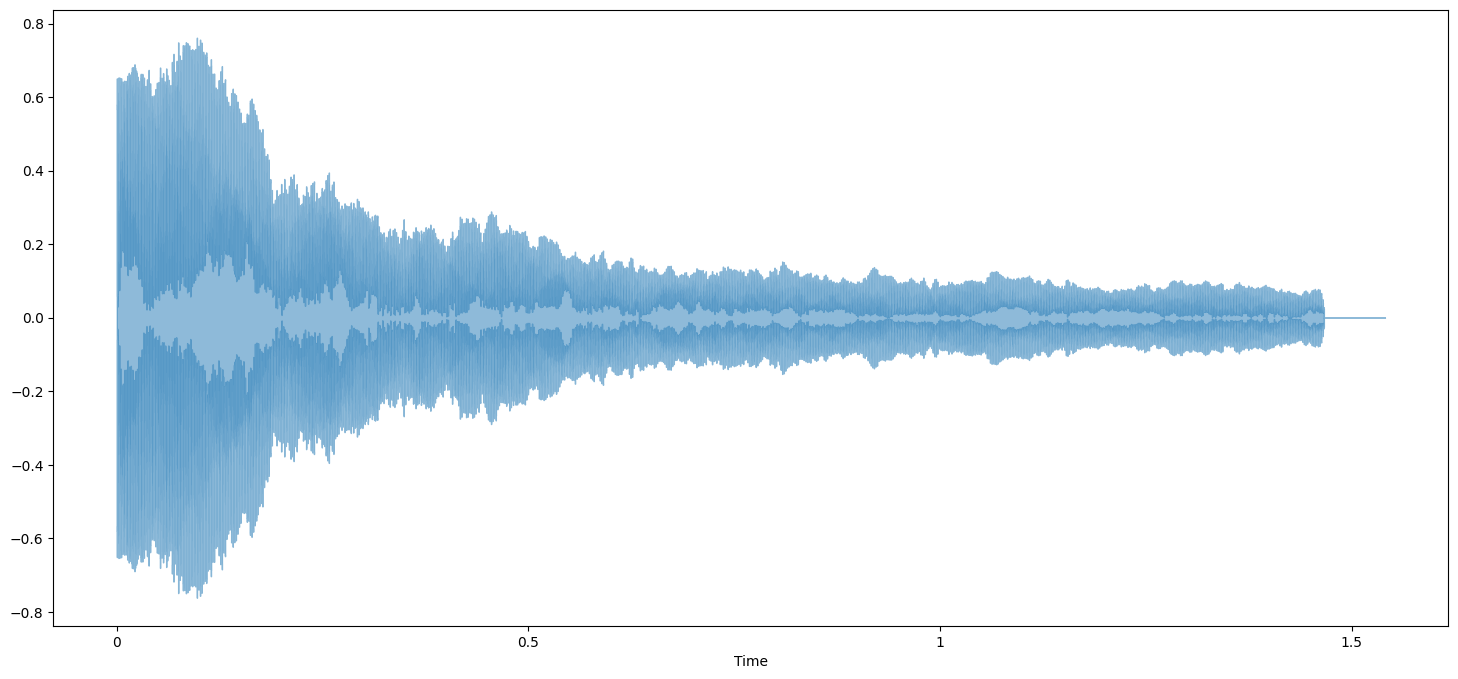

In [10]:
# plot waveform
plt.figure(figsize=(18, 8))
librosa.display.waveshow(signal, sr=sr, alpha=0.5)
plt.show()

In [13]:
ft = sp.fft.fft(signal)

ft

array([-42.619133 -0.j       , -34.29712  +6.5602164j,
       -29.963587 +7.4250393j, ..., -27.41175 -12.94617j  ,
       -29.963587 -7.4250393j, -34.29712  -6.5602164j], dtype=complex64)

In [24]:
signal

array([-3.4608310e-01, -5.7889587e-01, -5.7302415e-01, ...,
        3.5212681e-06, -5.3511017e-06, -6.6172838e-06], dtype=float32)

In [14]:
# derive spectrum using FT
ft = sp.fft.fft(signal)
magnitude = np.absolute(ft)
frequency = np.linspace(0, sr, len(magnitude)) 

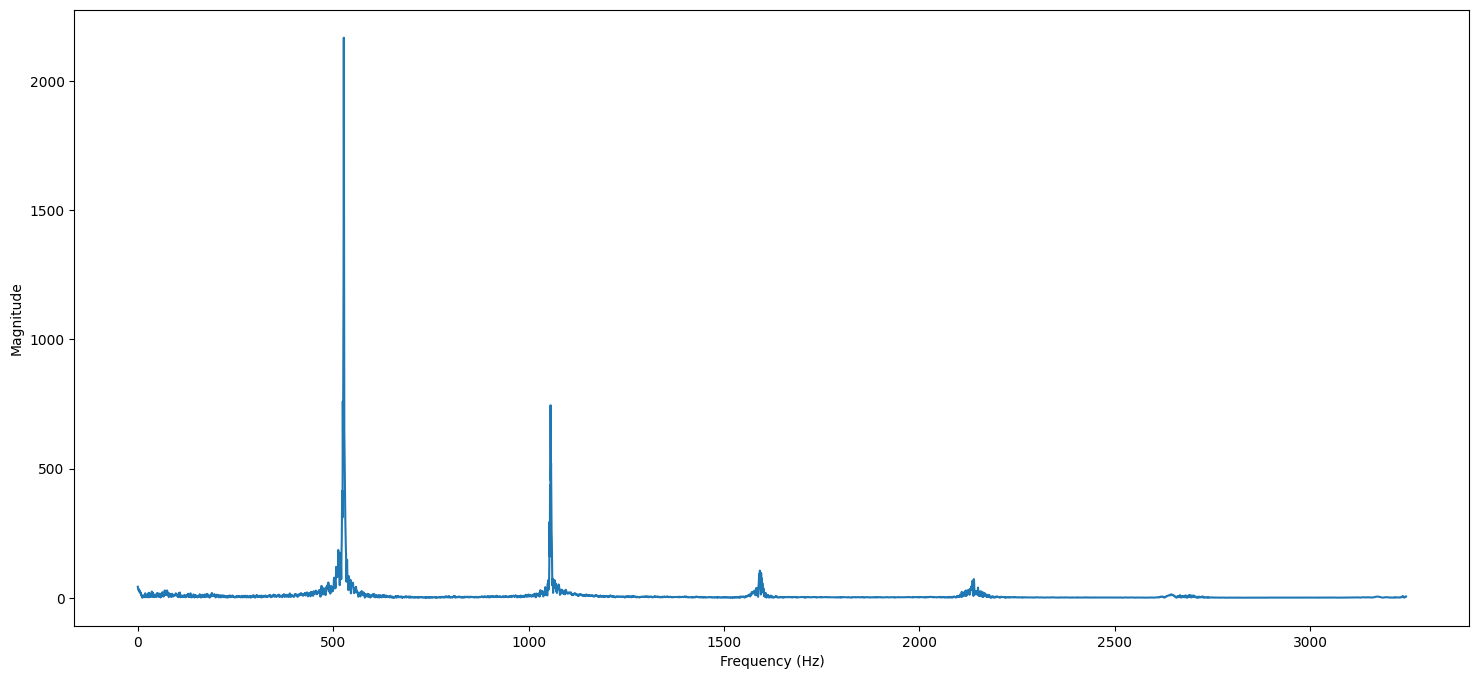

In [15]:
# plot spectrum
plt.figure(figsize=(18, 8))
plt.plot(frequency[:5000], magnitude[:5000]) # magnitude spectrum
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.show()

In [25]:
len(signal)

33968

In [27]:
d =  1 / sr
d



4.5351473922902495e-05

In [28]:
d_523 = 1 / 523
d_523


0.0019120458891013384

In [29]:
d_400_samples = 400 * d
d_400_samples

0.018140589569160998

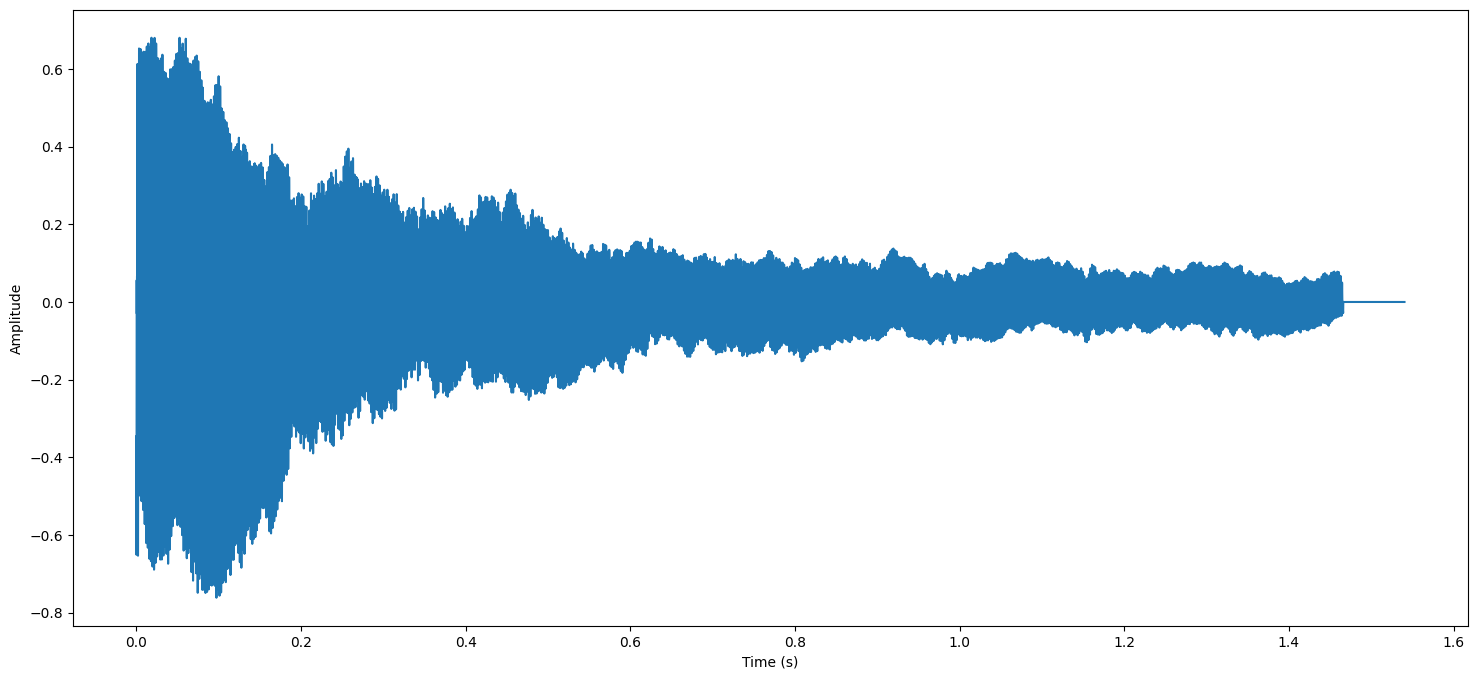

In [39]:
# zomm in to the waveform
samples = range(len(signal))
t = librosa.samples_to_time(samples, sr=sr)

plt.figure(figsize=(18, 8))
plt.plot(t[10000:10400], signal[10000:10400]) 
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

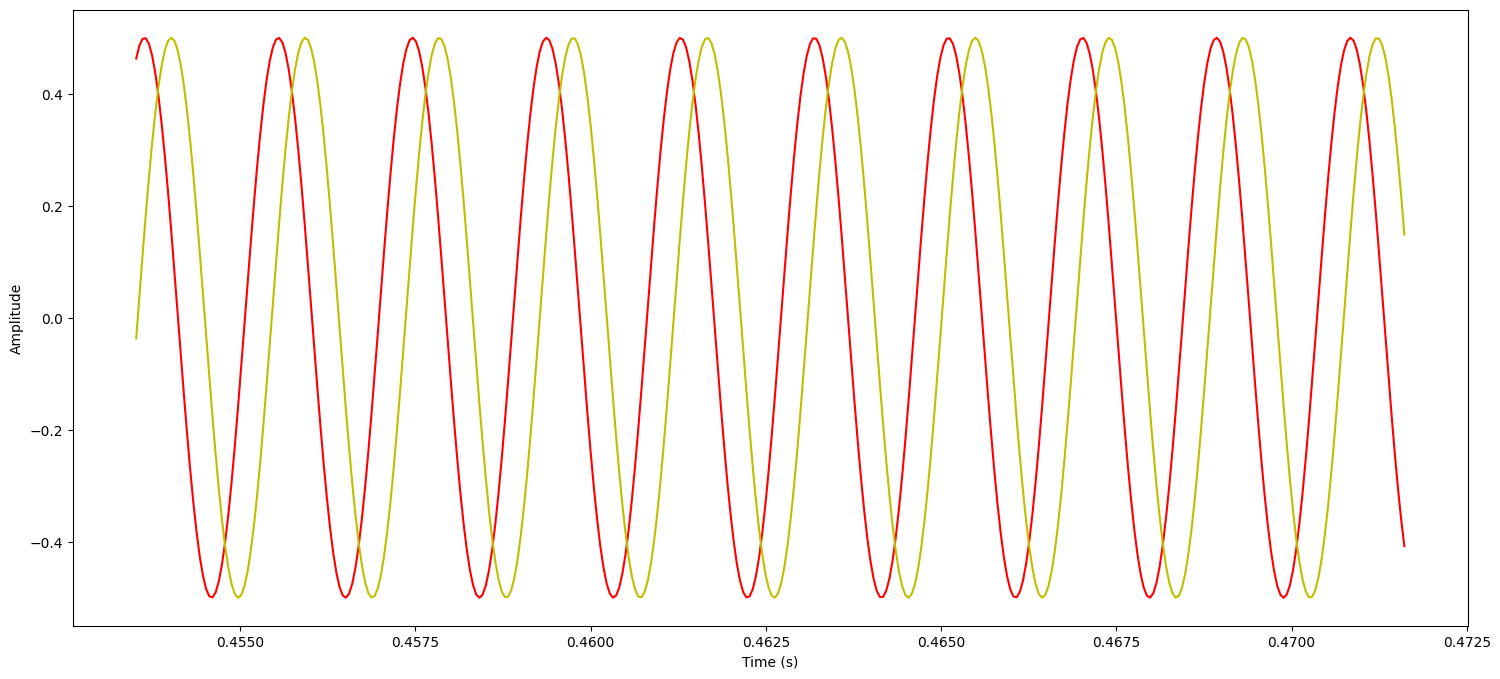

In [33]:
# create a sinusoid

f = 523
phase = 0
phase2 = 0.2

sin = 0.5 * np.sin(2*np.pi * (f * t - phase))
sin2 = 0.5 * np.sin(2*np.pi * (f * t - phase2))

plt.figure(figsize=(18, 8))
plt.plot(t[10000:10400], sin[10000:10400], color="r")
plt.plot(t[10000:10400], sin2[10000:10400], color="y")


plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()



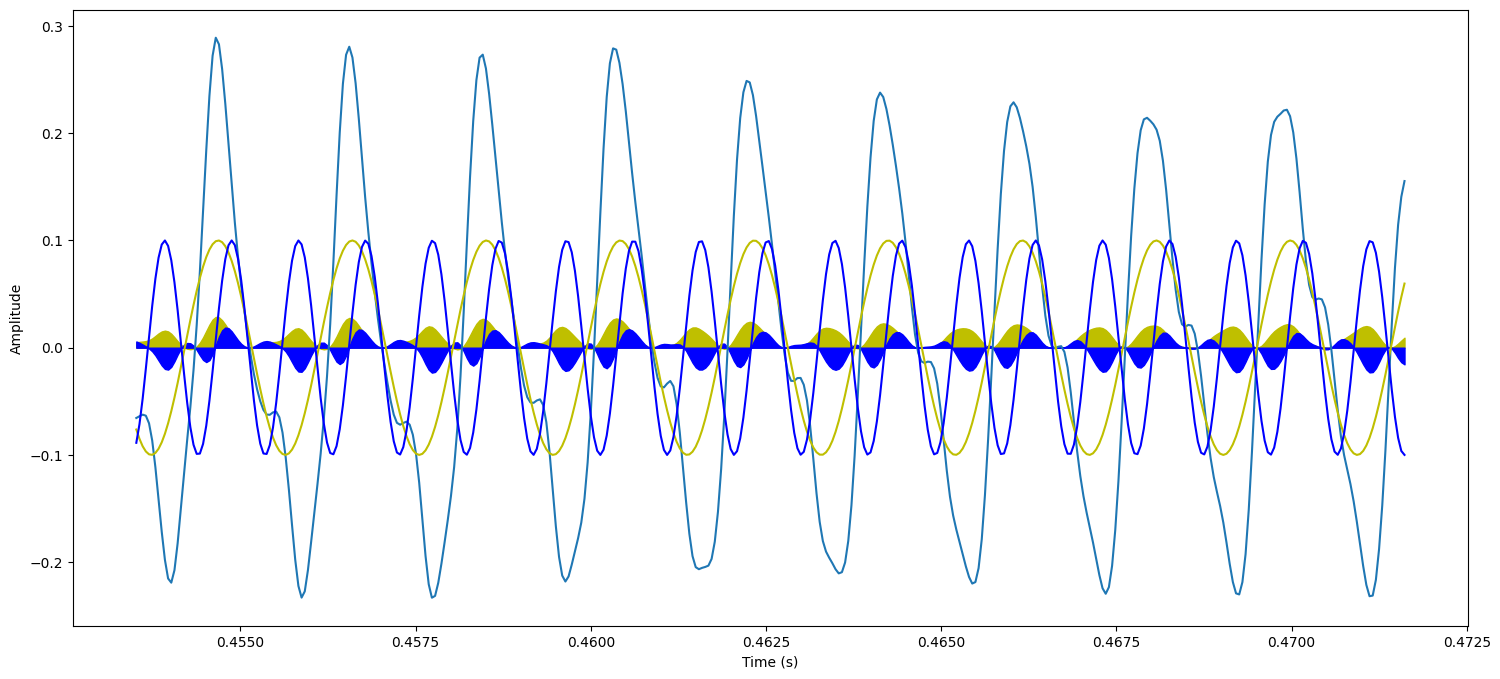

In [36]:
# compare signal and sinusoids

f = 523
phase = 0.55

sin = 0.1 * np.sin(2*np.pi * (f * t - phase))
sin_2 = 0.1 * np.sin(2*np.pi * (2*f * t - phase))


plt.figure(figsize=(18, 8))
plt.plot(t[10000:10400], signal[10000:10400]) 
plt.plot(t[10000:10400], sin[10000:10400], color="y")
plt.plot(t[10000:10400], sin_2[10000:10400], color="b")


plt.fill_between(t[10000:10400], sin[10000:10400]*signal[10000:10400], color="y")
plt.fill_between(t[10000:10400], sin_2[10000:10400]*signal[10000:10400], color="b")


plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()



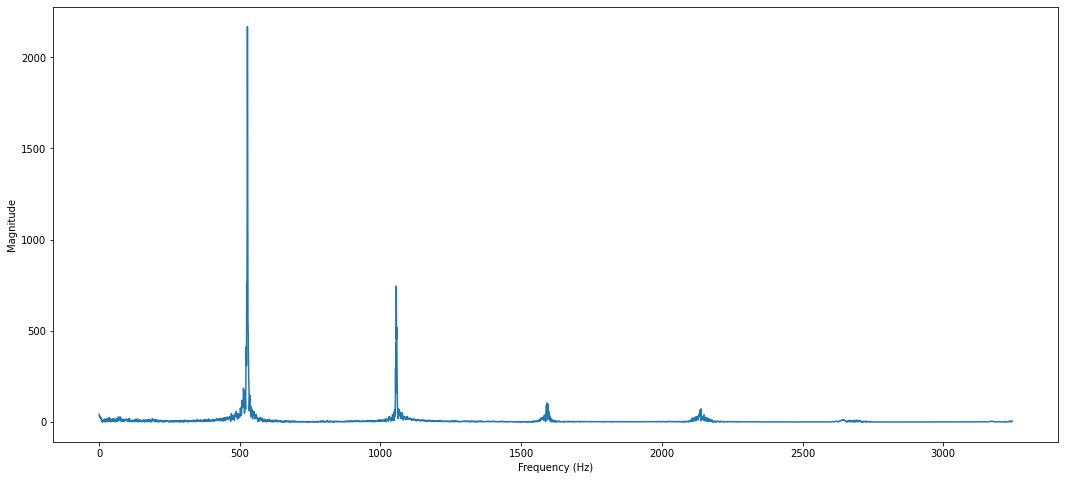

In [14]:
# plot spectrum
plt.figure(figsize=(18, 8))
plt.plot(frequency[:5000], magnitude[:5000]) # magnitude spectrum
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.show()



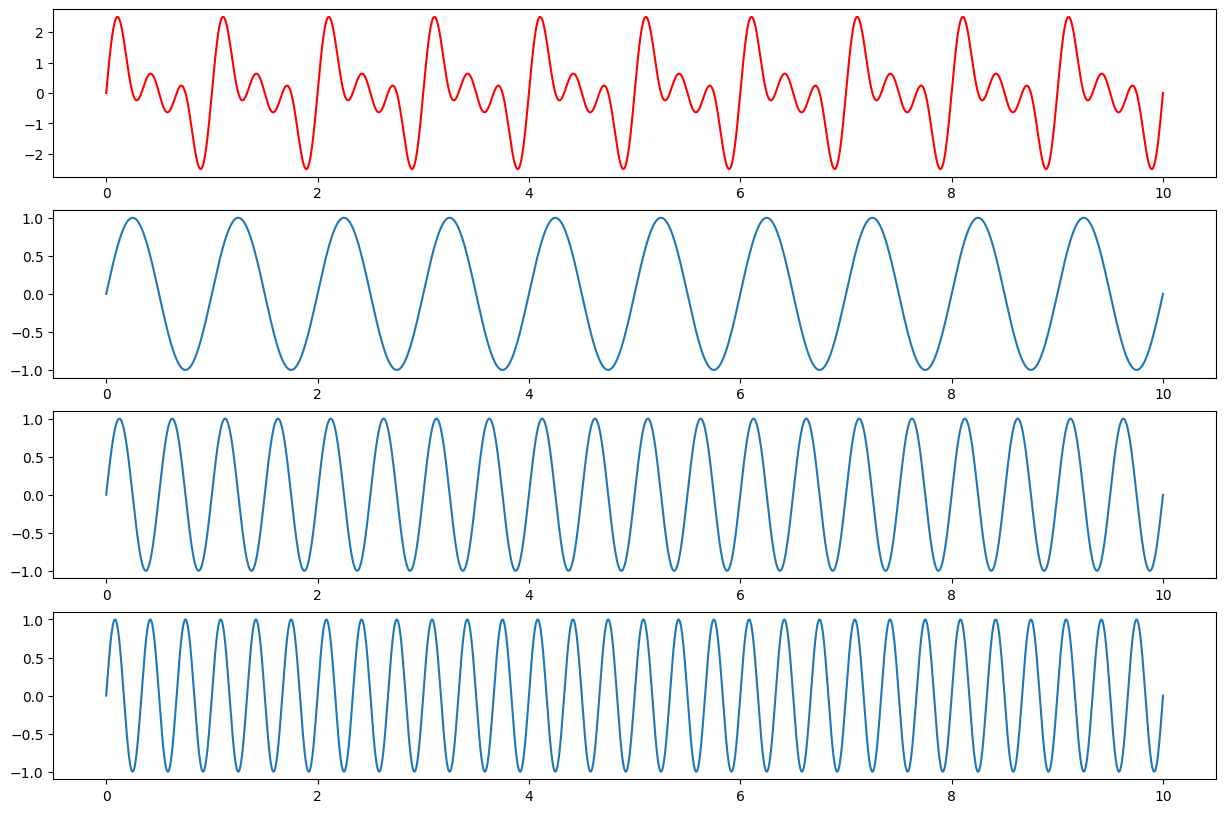

In [37]:
# superimposing pure tones
f = 1
t = np.linspace(0, 10, 10000)

sin = np.sin(2*np.pi * (f * t))
sin2 = np.sin(2*np.pi * (2*f * t))
sin3 = np.sin(2*np.pi * (3*f * t))

sum_signal = sin + sin2 + sin3

plt.figure(figsize=(15, 10))

plt.subplot(4, 1, 1)
plt.plot(t, sum_signal, color="r")

plt.subplot(4, 1, 2)
plt.plot(t, sin)

plt.subplot(4, 1, 3)
plt.plot(t, sin2)

plt.subplot(4, 1, 4)
plt.plot(t, sin3)

plt.show()